In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/raima-new-with-mistral/new 3 (1).pdf
/kaggle/input/raima-new-with-mistral/new2 (1).pdf


In [23]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [24]:
import os
import PyPDF2

def extract_paragraphs_from_pdfs_in_folder(folder_path, keyword):
    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        # Only process PDF files
        if file_name.endswith('.pdf'):
            pdf_path = os.path.join(folder_path, file_name)
            print(f"\nSearching in PDF: {file_name}")
            
            with open(pdf_path, 'rb') as file:
                reader = PyPDF2.PdfReader(file)
                found_any = False  # Flag to indicate if the keyword was found in this PDF
                
                # Loop through all pages in the current PDF
                for page_num in range(len(reader.pages)):
                    page = reader.pages[page_num]
                    text = page.extract_text()

                    # Split the text into paragraphs (assuming paragraphs are separated by newlines)
                    text_paragraphs = text.split('\n\n')
                    for para in text_paragraphs:
                        if keyword.lower() in para.lower():
                            # Print the PDF name, page number, and paragraph
                            print(f"\nKeyword found on page {page_num + 1}:")
                            print(f"Paragraph: {para.strip()}\n")
                            found_any = True
                
                if not found_any:
                    print(f"No paragraphs found containing the keyword: {keyword}")

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import PyPDF2
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Function to extract text from a PDF
def extract_text_from_pdf(pdf_path):
    pdf_file = open(pdf_path, 'rb')
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    text = ""
    for page in pdf_reader.pages:
        text += page.extract_text()
    pdf_file.close()
    return text

# Preprocessing the text: Remove stopwords and tokenize
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens

# Simple RNN model for demonstration
def build_rnn_model(vocab_size, embedding_dim, input_length):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
        tf.keras.layers.SimpleRNN(128, return_sequences=True),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
folder_path = '/kaggle/input/raima-new-with-mistral' 

In [31]:
keyword = 'deep learning-based'

In [32]:
extract_paragraphs_from_pdfs_in_folder(folder_path, keyword)


Searching in PDF: new 3 (1).pdf
No paragraphs found containing the keyword: deep learning-based

Searching in PDF: new2 (1).pdf
No paragraphs found containing the keyword: deep learning-based


In [8]:
pip install pdfplumber reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 61.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 55.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 9.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pdfplumber
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
import os

def highlight_keyword_in_pdf(input_pdf_path, output_pdf_path, keyword):
    # Open the PDF with pdfplumber
    with pdfplumber.open(input_pdf_path) as pdf:
        # Create a reportlab canvas to overlay highlights
        c = canvas.Canvas(output_pdf_path, pagesize=letter)

        # Iterate through pages
        for page_num, page in enumerate(pdf.pages):
            text = page.extract_text()
            if keyword.lower() in text.lower():
                print(f"Keyword found on page {page_num + 1}")
                
                # Get all the words and their positions on the page
                words = page.extract_words()
                for word in words:
                    if keyword.lower() in word['text'].lower():
                        # Get the bounding box of the keyword
                        x0, top, x1, bottom = word['x0'], word['top'], word['x1'], word['bottom']
                        
                        # Draw a rectangle around the keyword on the canvas
                        c.setStrokeColorRGB(1, 0, 0)  # Red outline
                        c.setFillColorRGB(1, 1, 0)    # Yellow fill for highlight
                        c.rect(x0, 800 - bottom, x1 - x0, bottom - top, fill=1)
            
            # Add the current page to the canvas
            c.showPage()

        # Save the output PDF
        c.save()

In [10]:

# Usage example
input_folder = '/kaggle/input/raima-new-with-mistral'
output_folder = '/kaggle/working/'
keyword = 'Fig.3 Selection of the number of keywords K'

# Iterate over PDFs in the folder
for file_name in os.listdir(input_folder):
    if file_name.endswith('.pdf'):
        input_pdf_path = os.path.join(input_folder, file_name)
        output_pdf_path = os.path.join(output_folder, f'highlighted_{file_name}')
        
        # Highlight the keyword in the PDF
        highlight_keyword_in_pdf(input_pdf_path, output_pdf_path, keyword)

        print(f"Highlighted PDF saved as: {output_pdf_path}")

Highlighted PDF saved as: /kaggle/working/highlighted_new 3 (1).pdf
Keyword found on page 5
Highlighted PDF saved as: /kaggle/working/highlighted_new2 (1).pdf


In [11]:
pip install pdfplumber Pillow

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pdfplumber
from PIL import Image

def extract_snippet_as_jpg(input_pdf_path, output_image_path, keyword):
    with pdfplumber.open(input_pdf_path) as pdf:
        # Loop through pages
        for page_num, page in enumerate(pdf.pages):
            text = page.extract_text()

            # If keyword is found on the current page
            if keyword.lower() in text.lower():
                print(f"Keyword found on page {page_num + 1}")
                
                # Extract words and their coordinates from the page
                words = page.extract_words()

                for word in words:
                    if keyword.lower() in word['text'].lower():
                        # Get the bounding box of the keyword (x0, top, x1, bottom)
                        x0, top, x1, bottom = word['x0'], word['top'], word['x1'], word['bottom']
                        
                        # Crop the region around the keyword from the page
                        crop_box = (x0 - 50, top - 50, x1 + 50, bottom + 50)  # Add padding for better visualization
                        cropped_image = page.to_image().crop(crop_box)

                        # Convert to a PIL Image and save as JPG
                        cropped_image = cropped_image.image.convert('RGB')  # Ensure RGB for JPG format
                        output_image_file = f"{output_image_path}_page_{page_num + 1}.jpg"
                        cropped_image.save(output_image_file, 'JPEG')

                        print(f"Snippet saved as {output_image_file}")
                        return  # Exit after the first match (remove this line if you want all matches)

    print(f"Keyword '{keyword}' not found in {input_pdf_path}")

In [13]:
import pdfplumber
from PIL import Image

def extract_snippet_as_jpg(input_pdf_path, output_image_path, keyword):
    with pdfplumber.open(input_pdf_path) as pdf:
        # Loop through pages
        for page_num, page in enumerate(pdf.pages):
            text = page.extract_text()

            # If keyword is found on the current page
            if keyword.lower() in text.lower():
                print(f"Keyword found on page {page_num + 1}")
                
                # Extract words and their coordinates from the page
                words = page.extract_words()

                for word in words:
                    if keyword.lower() in word['text'].lower():
                        # Get the bounding box of the keyword (x0, top, x1, bottom)
                        x0, top, x1, bottom = word['x0'], word['top'], word['x1'], word['bottom']
                        
                        # Convert the page to an image
                        page_image = page.to_image()

                        # Crop the region around the keyword from the page image
                        cropped_image = page_image.original.crop((x0 - 50, top - 50, x1 + 50, bottom + 50))

                        # Save the cropped image as a JPG
                        output_image_file = f"{output_image_path}_page_{page_num + 1}.jpg"
                        cropped_image.save(output_image_file, 'JPEG')

                        print(f"Snippet saved as {output_image_file}")
                        return  # Exit after the first match (remove this line if you want all matches)

    print(f"Keyword '{keyword}' not found in {input_pdf_path}")

In [14]:
# Usage example
input_pdf_path = '/kaggle/input/raima-new-with-mistral/new2 (1).pdf'  # Path to your PDF
output_image_path = '/kaggle/working/'  # Output JPG file path prefix
keyword = 'Parameter'  # The word you are searching for

extract_snippet_as_jpg(input_pdf_path, output_image_path, keyword)

Keyword found on page 5
Snippet saved as /kaggle/working/_page_5.jpg


Keyword found on page 1
Snippet saved as /kaggle/working/_page_1.jpg


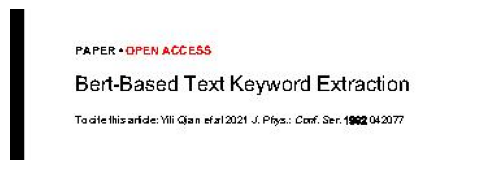

In [15]:
import pdfplumber
from PIL import Image
import matplotlib.pyplot as plt

def extract_snippet_as_jpg(input_pdf_path, output_image_path, keyword):
    with pdfplumber.open(input_pdf_path) as pdf:
        # Loop through pages
        for page_num, page in enumerate(pdf.pages):
            text = page.extract_text()

            # If the keyword (sentence or phrase) is found on the current page
            if keyword.lower() in text.lower():
                print(f"Keyword found on page {page_num + 1}")
                
                # Extract words and their positions from the page
                words = page.extract_words()
                matching_boxes = []

                # Create a combined string from extracted words to search for multi-word phrases
                extracted_text = " ".join([word['text'] for word in words])
                
                # Search for the keyword in the combined extracted text
                if keyword.lower() in extracted_text.lower():
                    # Now, find the bounding boxes for the phrase
                    keyword_split = keyword.split()
                    current_match = []

                    for word in words:
                        if keyword_split and word['text'].lower() == keyword_split[0].lower():
                            current_match.append(word)
                            keyword_split.pop(0)
                        else:
                            current_match = []  # reset if the sequence breaks
                            keyword_split = keyword.split()  # reset the keyword split

                        if not keyword_split:  # full phrase matched
                            matching_boxes = current_match
                            break

                    if matching_boxes:
                        # Get the bounding box coordinates for the full phrase
                        x0 = min(word['x0'] for word in matching_boxes)
                        top = min(word['top'] for word in matching_boxes)
                        x1 = max(word['x1'] for word in matching_boxes)
                        bottom = max(word['bottom'] for word in matching_boxes)

                        # Convert the page to an image
                        page_image = page.to_image()

                        # Crop the region around the matched phrase
                        crop_box = (x0 - 50, top - 50, x1 + 50, bottom + 50)  # Add padding for better visualization
                        cropped_image = page_image.original.crop(crop_box)

                        # Save the cropped image as a JPG
                        output_image_file = f"{output_image_path}_page_{page_num + 1}.jpg"
                        cropped_image.save(output_image_file, 'JPEG')

                        print(f"Snippet saved as {output_image_file}")
                        
                        # Plot the cropped image using matplotlib
                        plot_image(output_image_file)

                        return  # Exit after the first match (remove this line if you want all matches)

    print(f"Keyword '{keyword}' not found in {input_pdf_path}")

def plot_image(image_path):
    # Open the image file
    img = Image.open(image_path)
    
    # Plot the image using matplotlib
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Usage example
input_pdf_path = '/kaggle/input/raima-new-with-mistral/new2 (1).pdf'  # Path to your PDF
output_image_path = '/kaggle/working/'  # Output JPG file path prefix
keyword = 'Bert-Based Text Keyword Extraction'  # The phrase you're searching for

extract_snippet_as_jpg(input_pdf_path, output_image_path, keyword)

Keyword found on page 2
Snippet saved as /kaggle/working/_page_2.jpg


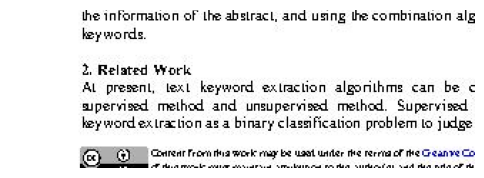

In [16]:
import pdfplumber
from PIL import Image
import matplotlib.pyplot as plt

def extract_snippet_as_jpg(input_pdf_path, output_image_path, keyword):
    with pdfplumber.open(input_pdf_path) as pdf:
        # Loop through pages
        for page_num, page in enumerate(pdf.pages):
            text = page.extract_text()

            # If the keyword (sentence or phrase) is found on the current page
            if keyword.lower() in text.lower():
                print(f"Keyword found on page {page_num + 1}")
                
                # Extract words and their positions from the page
                words = page.extract_words()
                matching_boxes = []

                # Create a combined string from extracted words to search for multi-word phrases
                extracted_text = " ".join([word['text'] for word in words])
                
                # Search for the keyword in the combined extracted text
                if keyword.lower() in extracted_text.lower():
                    # Now, find the bounding boxes for the phrase
                    keyword_split = keyword.split()
                    current_match = []

                    for word in words:
                        if keyword_split and word['text'].lower() == keyword_split[0].lower():
                            current_match.append(word)
                            keyword_split.pop(0)
                        else:
                            current_match = []  # reset if the sequence breaks
                            keyword_split = keyword.split()  # reset the keyword split

                        if not keyword_split:  # full phrase matched
                            matching_boxes = current_match
                            break

                    if matching_boxes:
                        # Get the bounding box coordinates for the full phrase
                        x0 = min(word['x0'] for word in matching_boxes)
                        top = min(word['top'] for word in matching_boxes)
                        x1 = max(word['x1'] for word in matching_boxes)
                        bottom = max(word['bottom'] for word in matching_boxes)

                        # Convert the page to an image
                        page_image = page.to_image()

                        # Crop the region around the matched phrase
                        crop_box = (x0 - 50, top - 50, x1 + 50, bottom + 50)  # Add padding for better visualization
                        cropped_image = page_image.original.crop(crop_box)

                        # Save the cropped image as a JPG
                        output_image_file = f"{output_image_path}_page_{page_num + 1}.jpg"
                        cropped_image.save(output_image_file, 'JPEG')

                        print(f"Snippet saved as {output_image_file}")
                        
                        # Plot the cropped image using matplotlib
                        plot_image(output_image_file)

                        return  # Exit after the first match (remove this line if you want all matches)

    print(f"Keyword '{keyword}' not found in {input_pdf_path}")

def plot_image(image_path):
    # Open the image file
    img = Image.open(image_path)
    
    # Plot the image using matplotlib
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Usage example
input_pdf_path = '/kaggle/input/raima-new-with-mistral/new2 (1).pdf'  # Path to your PDF
output_image_path = '/kaggle/working/'  # Output JPG file path prefix
keyword = 'At present, text keyword extraction algorithms'  # The phrase you're searching for

extract_snippet_as_jpg(input_pdf_path, output_image_path, keyword)

Keyword found on page 5
Snippet saved as /kaggle/working/_page_5.jpg


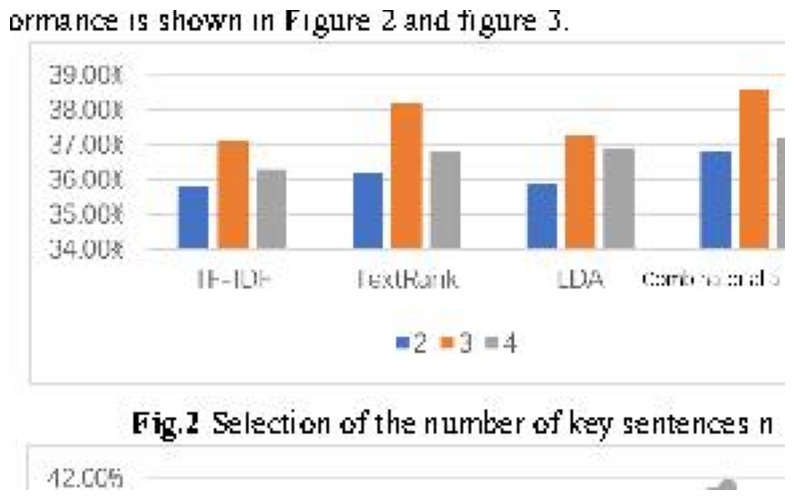

Keyword 'Selection of the number of key sentences n' not found in /kaggle/input/raima-new-with-mistral/new2 (1).pdf


In [17]:
import pdfplumber
from PIL import Image
import matplotlib.pyplot as plt

def extract_snippet_as_jpg(input_pdf_path, output_image_path, keyword, dpi=300, crop_fraction=0.5):
    with pdfplumber.open(input_pdf_path) as pdf:
        # Loop through pages
        for page_num, page in enumerate(pdf.pages):
            text = page.extract_text()

            # If the keyword (sentence or phrase) is found on the current page
            if keyword.lower() in text.lower():
                print(f"Keyword found on page {page_num + 1}")
                
                # Extract words and their positions from the page
                words = page.extract_words()
                matching_boxes = []

                # Create a combined string from extracted words to search for multi-word phrases
                extracted_text = " ".join([word['text'] for word in words])
                
                # Search for the keyword in the combined extracted text
                if keyword.lower() in extracted_text.lower():
                    # Now, find the bounding boxes for the phrase
                    keyword_split = keyword.split()
                    current_match = []

                    for word in words:
                        if keyword_split and word['text'].lower() == keyword_split[0].lower():
                            current_match.append(word)
                            keyword_split.pop(0)
                        else:
                            current_match = []  # reset if the sequence breaks
                            keyword_split = keyword.split()  # reset the keyword split

                        if not keyword_split:  # full phrase matched
                            matching_boxes = current_match
                            break

                    if matching_boxes:
                        # Get the bounding box coordinates for the full phrase
                        x0 = min(word['x0'] for word in matching_boxes)
                        top = min(word['top'] for word in matching_boxes)
                        x1 = max(word['x1'] for word in matching_boxes)
                        bottom = max(word['bottom'] for word in matching_boxes)

                        # Convert the page to an image with high resolution
                        page_image = page.to_image(resolution=dpi)  # Use higher DPI for better quality

                        # Calculate the crop area to capture half of the page above and below the keyword
                        page_height = page.height
                        crop_top = max(0, top - int(crop_fraction * page_height))  # Capture half the page above
                        crop_bottom = min(page_height, bottom + int(crop_fraction * page_height))  # Capture half the page below

                        # Create a crop box with some horizontal padding
                        crop_box = (max(0, x0 - 50), crop_top, min(page.width, x1 + 50), crop_bottom)
                        
                        cropped_image = page_image.original.crop(crop_box)

                        # Save the cropped image as a JPG
                        output_image_file = f"{output_image_path}_page_{page_num + 1}.jpg"
                        cropped_image.save(output_image_file, 'JPEG')

                        print(f"Snippet saved as {output_image_file}")
                        
                      
                        plot_image(output_image_file)

                        

    print(f"Keyword '{keyword}' not found in {input_pdf_path}")

def plot_image(image_path):
    
    img = Image.open(image_path)
    
    
    plt.figure(figsize=(10, 10))  
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Usage example
input_pdf_path = '/kaggle/input/raima-new-with-mistral/new2 (1).pdf'  
output_image_path = '/kaggle/working/'  # Output JPG file path prefix
keyword = 'Selection of the number of key sentences n'  # The phrase you're searching for

extract_snippet_as_jpg(input_pdf_path, output_image_path, keyword, dpi=80, crop_fraction=0.1)

Keyword found in new2 (1).pdf on page 5
Snippet saved as /kaggle/working/new2 (1)_page_5.jpg


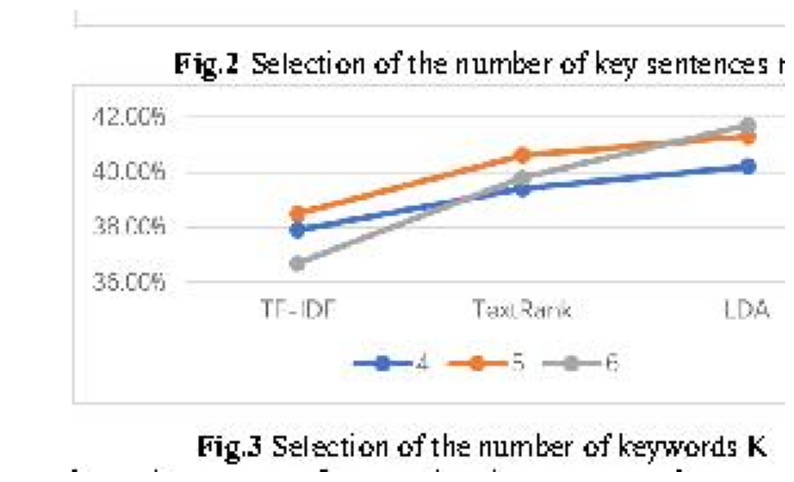

In [18]:
import pdfplumber
from PIL import Image
import matplotlib.pyplot as plt
import os

def extract_snippet_from_pdfs(folder_path, output_folder, keyword, dpi=300, crop_fraction=0.5):
    # List all PDF files in the folder
    pdf_files = [f for f in os.listdir(folder_path) if f.endswith('.pdf')]
    
    for pdf_file in pdf_files:
        input_pdf_path = os.path.join(folder_path, pdf_file)
        with pdfplumber.open(input_pdf_path) as pdf:
            # Loop through pages
            for page_num, page in enumerate(pdf.pages):
                text = page.extract_text()

                # If the keyword (sentence or phrase) is found on the current page
                if keyword.lower() in text.lower():
                    print(f"Keyword found in {pdf_file} on page {page_num + 1}")

                    # Extract words and their positions from the page
                    words = page.extract_words()
                    matching_boxes = []

                    # Create a combined string from extracted words to search for multi-word phrases
                    extracted_text = " ".join([word['text'] for word in words])

                    # Search for the keyword in the combined extracted text
                    if keyword.lower() in extracted_text.lower():
                        # Now, find the bounding boxes for the phrase
                        keyword_split = keyword.split()
                        current_match = []

                        for word in words:
                            if keyword_split and word['text'].lower() == keyword_split[0].lower():
                                current_match.append(word)
                                keyword_split.pop(0)
                            else:
                                current_match = []  # reset if the sequence breaks
                                keyword_split = keyword.split()  # reset the keyword split

                            if not keyword_split:  # full phrase matched
                                matching_boxes = current_match
                                break

                        if matching_boxes:
                            # Get the bounding box coordinates for the full phrase
                            x0 = min(word['x0'] for word in matching_boxes)
                            top = min(word['top'] for word in matching_boxes)
                            x1 = max(word['x1'] for word in matching_boxes)
                            bottom = max(word['bottom'] for word in matching_boxes)

                            # Convert the page to an image with high resolution
                            page_image = page.to_image(resolution=dpi)  # Use higher DPI for better quality

                            # Calculate the crop area to capture half of the page above and below the keyword
                            page_height = page.height
                            crop_top = max(0, top - int(crop_fraction * page_height))  # Capture half the page above
                            crop_bottom = min(page_height, bottom + int(crop_fraction * page_height))  # Capture half the page below

                            # Create a crop box with some horizontal padding
                            crop_box = (max(0, x0 - 50), crop_top, min(page.width, x1 + 50), crop_bottom)

                            cropped_image = page_image.original.crop(crop_box)

                            # Save the cropped image as a JPG in the output folder
                            output_image_file = f"{os.path.splitext(pdf_file)[0]}_page_{page_num + 1}.jpg"
                            output_image_path = os.path.join(output_folder, output_image_file)
                            cropped_image.save(output_image_path, 'JPEG')

                            print(f"Snippet saved as {output_image_path}")

                            # Plot the cropped image using matplotlib
                            plot_image(output_image_path)

                            return  # Exit after the first match (remove this line if you want to find all matches)

    print(f"Keyword '{keyword}' not found in any PDFs in the folder.")

def plot_image(image_path):
    # Open the image file
    img = Image.open(image_path)
    
    # Plot the image using matplotlib
    plt.figure(figsize=(10, 10))  # Set the figure size larger for better visibility
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Usage example
folder_path = '/kaggle/input/raima-new-with-mistral'  # Path to your folder containing PDFs
output_folder = '/kaggle/working/'  # Path to a writable output folder
keyword = 'Fig.3 Selection of the number of keywords K'  # The phrase you're searching for

extract_snippet_from_pdfs(folder_path, output_folder, keyword, dpi=80, crop_fraction=0.1)

Keyword found in new2 (1).pdf on page 3
Snippet saved as /kaggle/working/new2 (1)_page_3.jpg


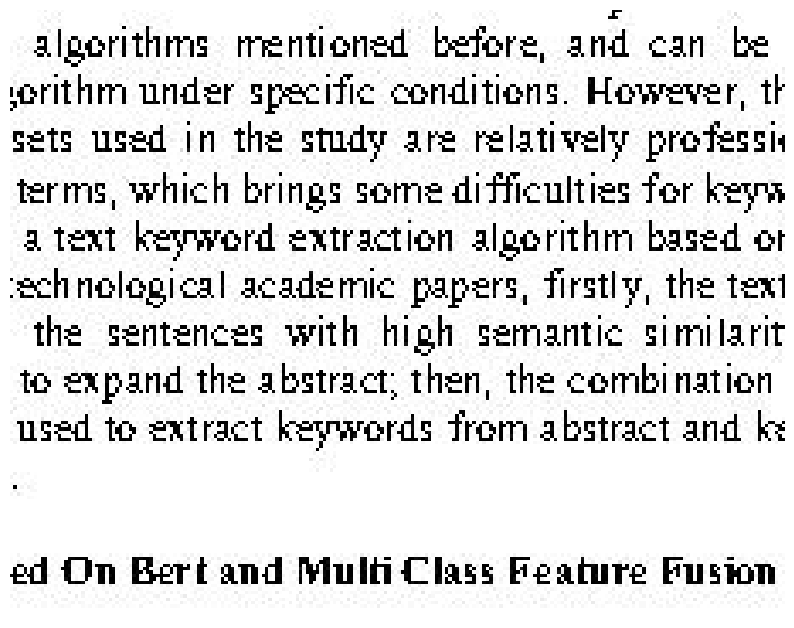

In [19]:
import pdfplumber
from PIL import Image
import matplotlib.pyplot as plt
import os

def extract_snippet_from_pdfs(folder_path, output_folder, keyword, dpi=300, crop_fraction=0.5):
    # List all PDF files in the folder
    pdf_files = [f for f in os.listdir(folder_path) if f.endswith('.pdf')]
    
    for pdf_file in pdf_files:
        input_pdf_path = os.path.join(folder_path, pdf_file)
        with pdfplumber.open(input_pdf_path) as pdf:
            # Loop through pages
            for page_num, page in enumerate(pdf.pages):
                text = page.extract_text()

                # If the keyword (sentence or phrase) is found on the current page
                if keyword.lower() in text.lower():
                    print(f"Keyword found in {pdf_file} on page {page_num + 1}")

                    # Extract words and their positions from the page
                    words = page.extract_words()
                    matching_boxes = []

                    # Create a combined string from extracted words to search for multi-word phrases
                    extracted_text = " ".join([word['text'] for word in words])

                    # Search for the keyword in the combined extracted text
                    if keyword.lower() in extracted_text.lower():
                        # Now, find the bounding boxes for the phrase
                        keyword_split = keyword.split()
                        current_match = []

                        for word in words:
                            if keyword_split and word['text'].lower() == keyword_split[0].lower():
                                current_match.append(word)
                                keyword_split.pop(0)
                            else:
                                current_match = []  # reset if the sequence breaks
                                keyword_split = keyword.split()  # reset the keyword split

                            if not keyword_split:  # full phrase matched
                                matching_boxes = current_match
                                break

                        if matching_boxes:
                            # Get the bounding box coordinates for the full phrase
                            x0 = min(word['x0'] for word in matching_boxes)
                            top = min(word['top'] for word in matching_boxes)
                            x1 = max(word['x1'] for word in matching_boxes)
                            bottom = max(word['bottom'] for word in matching_boxes)

                            # Convert the page to an image with high resolution
                            page_image = page.to_image(resolution=dpi)  # Use higher DPI for better quality

                            # Calculate the crop area to capture half of the page above and below the keyword
                            page_height = page.height
                            crop_top = max(0, top - int(crop_fraction * page_height))  # Capture half the page above
                            crop_bottom = min(page_height, bottom + int(crop_fraction * page_height))  # Capture half the page below

                            # Create a crop box with some horizontal padding
                            crop_box = (max(0, x0 - 50), crop_top, min(page.width, x1 + 50), crop_bottom)

                            cropped_image = page_image.original.crop(crop_box)

                            # Save the cropped image as a JPG in the output folder
                            output_image_file = f"{os.path.splitext(pdf_file)[0]}_page_{page_num + 1}.jpg"
                            output_image_path = os.path.join(output_folder, output_image_file)
                            cropped_image.save(output_image_path, 'JPEG')

                            print(f"Snippet saved as {output_image_path}")

                            # Plot the cropped image using matplotlib
                            plot_image(output_image_path)

                            return  # Exit after the first match (remove this line if you want to find all matches)

    print(f"Keyword '{keyword}' not found in any PDFs in the folder.")

def plot_image(image_path):
    # Open the image file
    img = Image.open(image_path)
    
    # Plot the image using matplotlib
    plt.figure(figsize=(10, 10))  # Set the figure size larger for better visibility
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Usage example
folder_path = '/kaggle/input/raima-new-with-mistral'  # Path to your folder containing PDFs
output_folder = '/kaggle/working/'  # Path to a writable output folder
keyword = 'Multi Class Feature Fusion'  # The phrase you're searching for

extract_snippet_from_pdfs(folder_path, output_folder, keyword, dpi=80, crop_fraction=0.1)